# k- 최근접 이웃 회귀

코드 수집 :
https://bit.ly/hg-03-1
https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb


## 데이터 준비 : 농어(56개)

In [16]:
import numpy as np

In [17]:
# 데이터 준비 : 56 개
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

## 시각화 모듈 import

In [18]:
import matplotlib.pyplot as plt

## 데이터 산포도 시각화

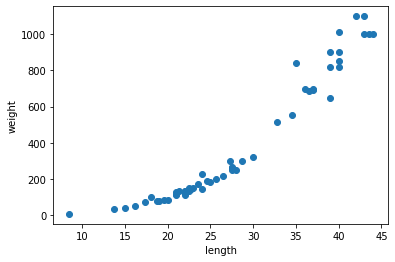

In [19]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 훈련, 테스트 데이터 분리
### sklearn import

In [20]:
from sklearn.model_selection import train_test_split

### 데이터 분리
데이터 셋 (8:2),(7:3) 비율로 분리해보기

In [21]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [22]:
print(train_input.shape, test_input.shape)

(42,) (14,)


### 배열 전처리
사일러킷 1차원 배열을 2차원 배열로 변경
test_arry(4,) -> test_array(2,2) 크기로 변경해줨

In [23]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [24]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


reshape() 매서드 사용

In [25]:
# 잘못된 행렬 생성 예
# train_input = train_input.reshape(2, 3)

In [26]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [27]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# KNN 알고리즘
## 결정 계수 R-제곱 ($ R^2$)
최소 제곱법 사용함 - 회귀에서는 결정계수를 사용
R-제곱 = $(타깃 - 예측)^2$ 의 합 / $(타깃 - 평균)^2$ 의 합
### sklearn import

In [28]:
from sklearn.neighbors import KNeighborsRegressor

### 모델 생성

In [29]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [30]:
knr.score(test_input, test_target)

0.992809406101064

### 오차 계산 (19.157... => 19g 오차가 발생함(평균 절대값 오차))

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

## 과대적합 vs 과소적합
과대적합-과소적합 확인이 필요( 나온값이 신뢰할수 있는지 확인 필요)
### 과대적합
모델을 지나치게 복잡하게 학습하여 학습 데이터셋에서는 모델 성능이 높게 나타나지만 정작 새로운 데이터가 주어졌을 때 정확한 예측/분류를 수행하지 못합니다.
### 과소적합
머신러닝 모델이 충분히 복잡하지 않아(최적화가 제대로 수행되지 않아) 학습 데이터의 구조/패턴을 정확히 반영하지 못하는 문제

In [33]:
knr.score(train_input, train_target)

0.9698823289099254

In [35]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3
# 모델 다시 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

### 훈련 세트 결정 계수

In [36]:
# 훈련 세트 점수
knr.score(train_input, train_target)

0.9804899950518966

### 테스트 세트 결정 계수

In [37]:
# 테스트 세트 점수
knr.score(test_input, test_target)

0.9746459963987609

# 확인문제

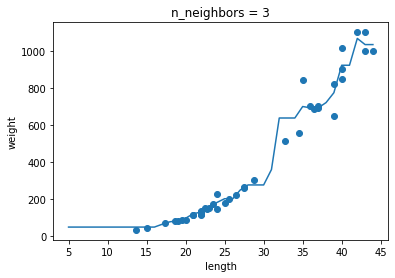

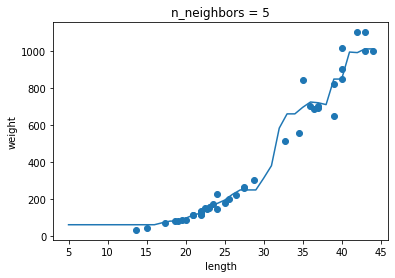

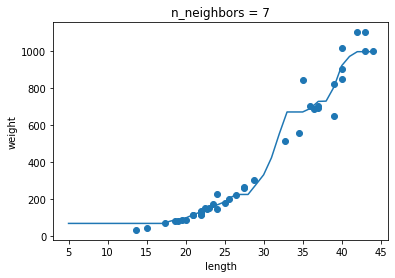

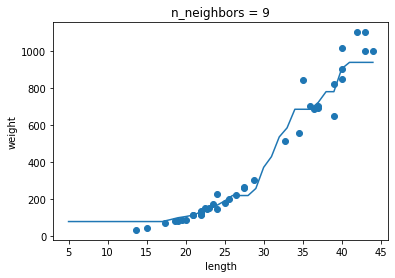

In [40]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표 생성
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 9일 때 예측 결과를 그래프로 그리기
for n in range(3, 10, 2):
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()